In [1]:
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
dataframe = pd.read_csv('../csv_files/income.csv')
dataframe.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
df = dataframe.drop('Name', axis='columns')
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


Text(0, 0.5, 'Income')

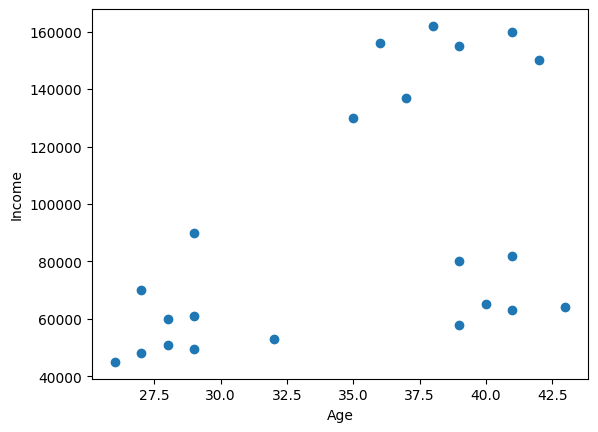

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
df['clusters'] = y_predicted

In [15]:
df.head()

,Age,Income($),clusters
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


C:\Users\user\AppData\Local\Temp\ipykernel_16928\3410134584.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


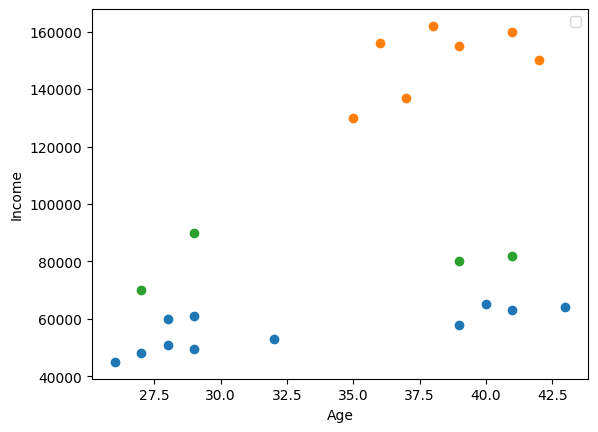

In [19]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1.Age, df1['Income($)'])
plt.scatter(df2.Age, df2['Income($)'])
plt.scatter(df3.Age, df3['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

plt.legend()

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [25]:
df.head()

,Age,Income($),clusters
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
df['clusters'] = y_predicted
df.head()

,Age,Income($),clusters
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,0


C:\Users\user\AppData\Local\Temp\ipykernel_16928\3083717653.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


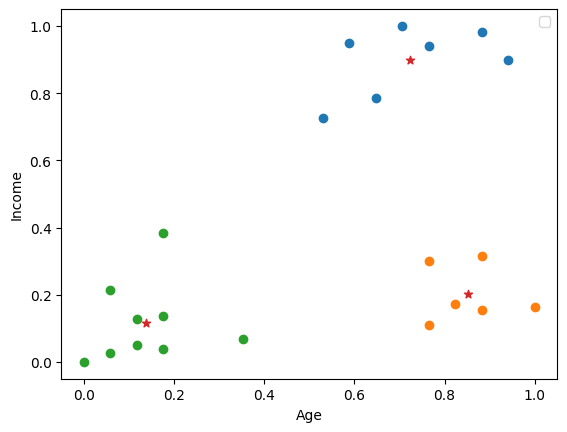

In [37]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]

plt.scatter(df1.Age, df1['Income($)'])
plt.scatter(df2.Age, df2['Income($)'])
plt.scatter(df3.Age, df3['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*')
plt.legend()

In [31]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df)
  sse.append(km.inertia_)

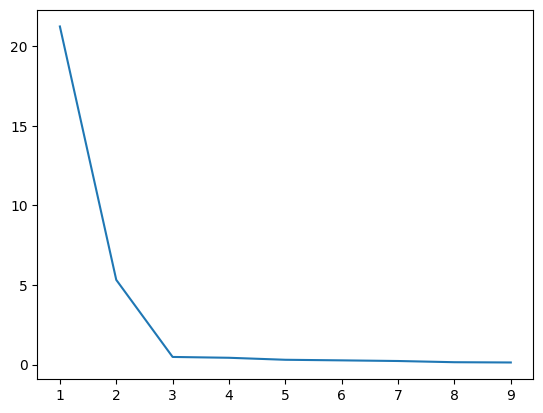

In [36]:
plt.plot(k_rng, sse)